# Introductions 
*Title*:Race Profile of LA County Residents
*Author*:Divine Mutoni 
*Description*:To understand the relationship between the proximity to active or closed/protected oil wells, and socio-economic indicators in Los Angeles, we are interested in understanding the demographic of residents nearest to these facilities. This notebook focuses on the race variables in the ACS 2022 5-year estimates data to assess the racial composition of census tract communities; an excercise that mirrors the analysis we will conduct for census tracts hosting oil wells in upcoming assignments to test the ingoing hypotheses that proximity to an active oil well correlates with a higher concentration of minority communities

In [11]:
## Panda and census data

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [3]:
race_LA = pd.read_csv('Data/ACS 2022_Race_5YEst.csv',
                     dtype={'FIPS':str,}
                     )

In [ ]:
### Preliminary inspection 

In [27]:
##Initial exploration of the data showing 2498 census tracts, and 44 columns of race-related variables in the data set, and no need for the drop.na function

In [4]:
race_LA.shape

(2498, 44)

In [5]:
race_LA.head()

,Census Tract,FIPS,Area (Land),Area (Water),Total Population,Population Density (Per Sq. Mile),Area (Land).1,Area Total:,Area Total: Area (Land),Area Total: Area (Water),...,Renter-Occupied Housing Units,Renter-Occupied Housing Units: White Alone Householder,Renter-Occupied Housing Units: Black or African American Alone Householder,Renter-Occupied Housing Units: American Indian and Alaska Native Alone Householder,Renter-Occupied Housing Units: Asian Alone Householder,Renter-Occupied Housing Units: Native Hawaiian and Other Pacific Islander Alone Householder,Renter-Occupied Housing Units: Some Other Race Alone Householder,Renter-Occupied Housing Units: Two or More Races Householder,"Renter-Occupied Housing Units: White Alone, Not Hispanic or Latino Householder",Renter-Occupied Housing Units: Hispanic or Latino Householder
0,101110,06037101110,1142401,0,4014,9100.317,0.441084,0.441084,0.441084,0.0,...,711,440,13,0,53,0,44,161,398,238
1,101122,06037101122,2644045,0,4164,4078.868,1.020872,1.020872,1.020872,0.0,...,344,287,0,0,0,0,33,24,287,33
2,101220,06037101220,698886,0,3481,12900.170,0.269841,0.269841,0.269841,0.0,...,767,419,0,13,70,0,97,168,398,276
3,101221,06037101221,354178,0,3756,27466.400,0.136749,0.136749,0.136749,0.0,...,1077,700,38,0,24,0,192,123,673,282
4,101222,06037101222,296512,0,2808,24527.460,0.114484,0.114484,0.114484,0.0,...,897,658,15,14,28,12,11,159,579,263


In [26]:
#look into the data types, including additional arguments typically used for datasets with many columns. **Results**: no missing values with the non-null counts, and all columsn are the object data type)

In [6]:
race_LA.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 44 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Census Tract                                                                                 2498 non-null   int64  
 1   FIPS                                                                                         2498 non-null   object 
 2   Area (Land)                                                                                  2498 non-null   int64  
 3   Area (Water)                                                                                 2498 non-null   int64  
 4   Total Population                                                                             2498 non-null   int64  
 5   Population Density (Per Sq. Mile) 

In [ ]:
### Analysis and plotting

In [ ]:
#Import geopson data with LA country census tract and geometry data

In [7]:
import geopandas as gpd

In [9]:
census_tract = gpd.read_file('Data/Census_Tracts_2020_DM.geojson')
census_tract.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [10]:
# Filtering and leaving only census tract data (CT20) and geometry columns as subset
census_tract = census_tract[['CT20','geometry']]
census_tract.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [11]:
census_tract['FIPS'] = '06'+ '037' + census_tract['CT20']
census_tract.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [18]:
census_tract_race=census_tract.merge(race_LA,on="FIPS")
census_tract_race.columns

Index(['CT20', 'geometry', 'FIPS', 'Census Tract', 'Area (Land)',
       'Area (Water)', 'Total Population', 'Population Density (Per Sq. Mile)',
       'Area (Land).1', 'Area Total:', 'Area Total: Area (Land)',
       'Area Total: Area (Water)', 'Total Population:',
       'Total Population: White Alone',
       'Total Population: Black or African American Alone',
       'Total Population: American Indian and Alaska Native Alone',
       'Total Population: Asian Alone',
       'Total Population: Native Hawaiian and Other Pacific Islander Alone',
       'Total Population: Some Other Race Alone',
       'Total Population: Two or More Races', 'Total Population.1',
       'Total Population: Not Hispanic or Latino',
       'Total Population: Not Hispanic or Latino: White Alone',
       'Total Population: Not Hispanic or Latino: Black or African American Alone',
       'Total Population: Not Hispanic or Latino: American Indian and Alaska Native Alone',
       'Total Population: Not Hispanic

In [ ]:
#Create columns for percentages of three racial/ethnic by hispanic groups: Non-hispanic WHite (NHWhite), Non-hispanic Black (PCT_Black), Non-hispanic Asia (PCT_Asian)

In [22]:
census_tract_race['PCT_Black'] = census_tract_race['Total Population: Not Hispanic or Latino: Black or African American Alone']/census_tract_race['Total Population:']*100
census_tract_race['PCT_White'] = census_tract_race['Total Population: Not Hispanic or Latino: White Alone']/census_tract_race['Total Population:']*100

In [23]:
census_tract_race['PCT_Asia'] = census_tract_race['Total Population: Not Hispanic or Latino: Asian Alone']/census_tract_race['Total Population:']*100

<Axes: >

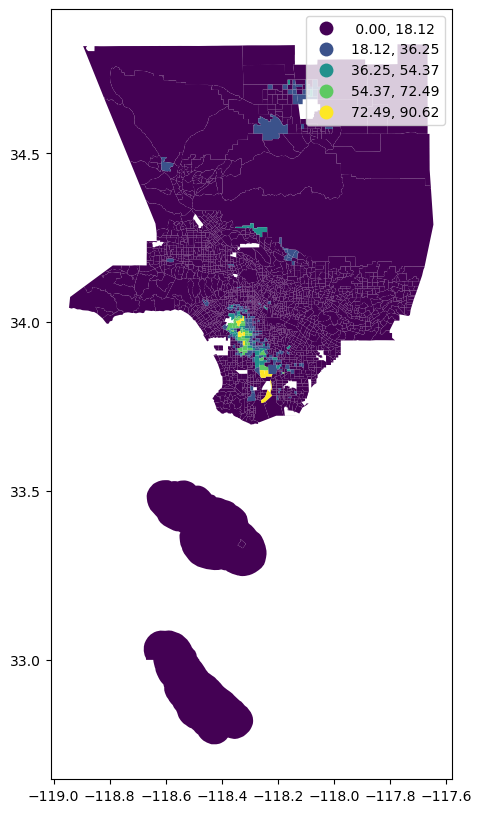

In [25]:
census_tract_race.plot(figsize=(12,10),
                 column='PCT_Black',
                 legend=True, 
                 scheme='equal_interval')

<Axes: >

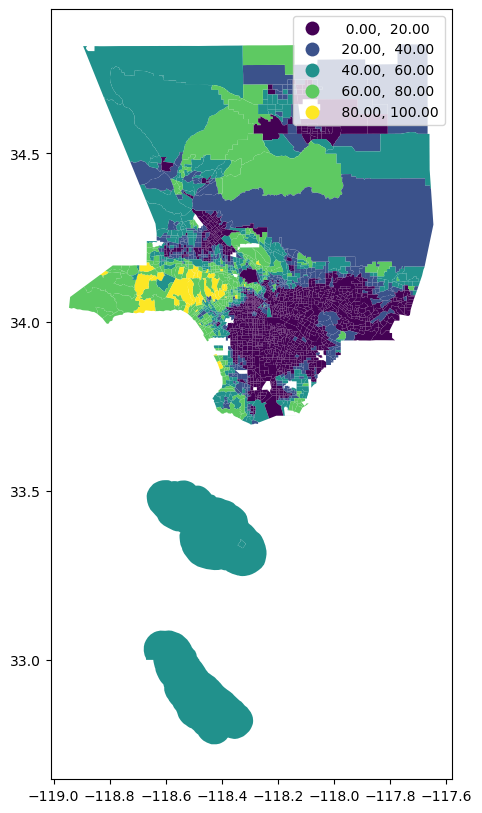

In [28]:
census_tract_race.plot(figsize=(12,10),
                 column='PCT_White',
                 legend=True, 
                 scheme='equal_interval')

In [ ]:
#Find percentage of population  (incl. API/ Hawaian, Native American, Some Other Race Alone, Two or More Races)

<Axes: >

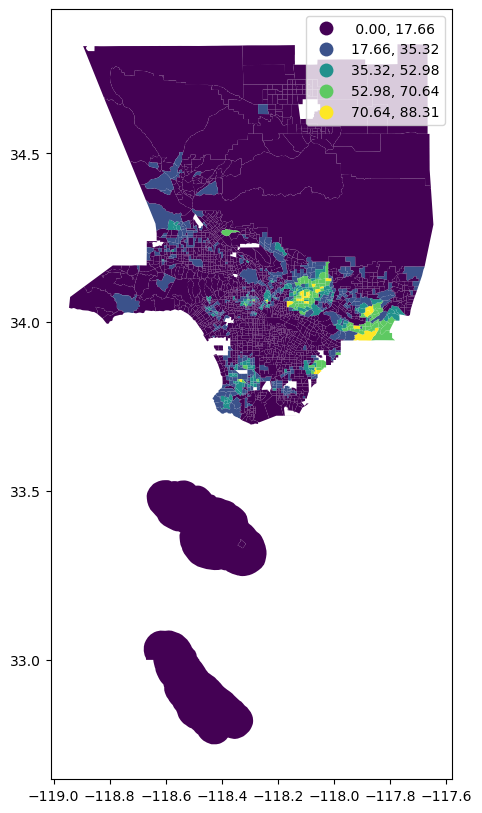

In [31]:
census_tract_race.plot(figsize=(12,10),
                 column='PCT_Asia',
                 legend=True, 
                 scheme='equal_interval')

#We can stop this analysis at a quick plot of the areas with the top 10 census tracks for the three aforementioned groups

<Axes: title={'center': 'Top 10 Census Tracts with Highest Black Population in Los Angeles County in 2020'}, ylabel='FIPS'>

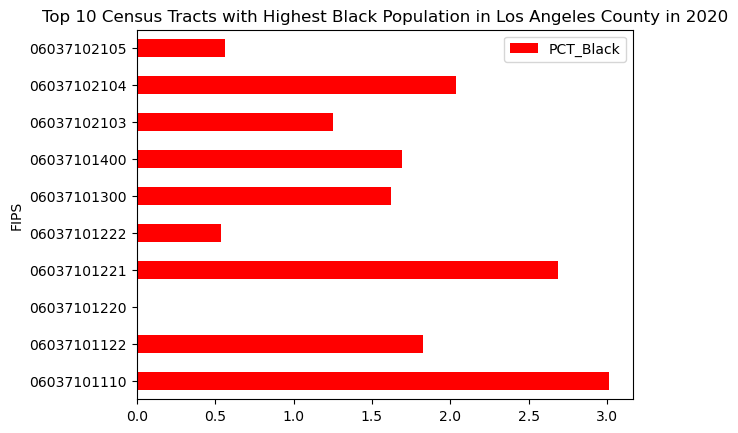

In [33]:
census_tract_race.head(10).plot.barh(x='FIPS',
                            y='PCT_Black', 
                            title='Top 10 Census Tracts with Highest Black Population in Los Angeles County in 2020',
                            color='red')

<Axes: title={'center': 'Top 10 Census Tracts with Highest NH White Population in Los Angeles County in 2020'}, ylabel='FIPS'>

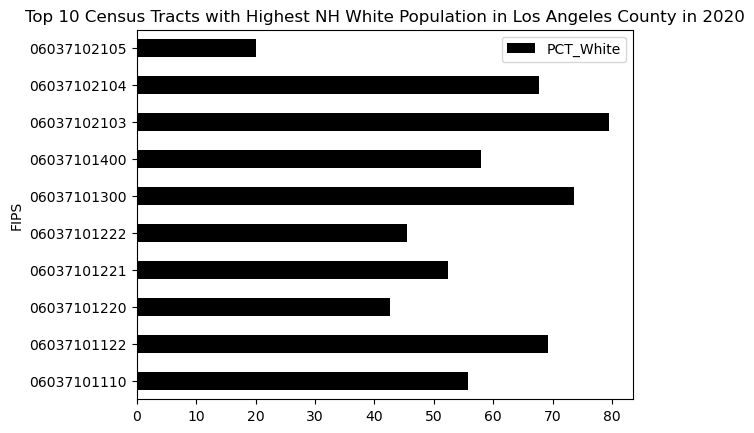

In [34]:
census_tract_race.head(10).plot.barh(x='FIPS',
                            y='PCT_White', 
                            title='Top 10 Census Tracts with Highest NH White Population in Los Angeles County in 2020',
                            color='black')

<Axes: title={'center': 'Top 10 Census Tracts with Highest Population in Los Angeles County in 2020'}, ylabel='FIPS'>

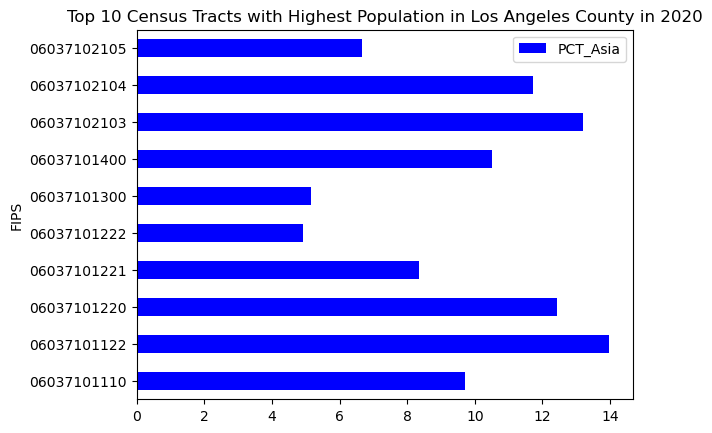

In [35]:
census_tract_race.head(10).plot.barh(x='FIPS',
                            y='PCT_Asia', 
                            title='Top 10 Census Tracts with Highest Population in Los Angeles County in 2020',
                            color='blue')